<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*Review of Introductory Linear Algebra*

* Modern Linear Algebra Applications
* Tensors, Vectors, and Norms
* Matrix Multiplication
* Matrix Inversion
* Identity, Diagonal and Orthogonal Matrices

*Segment 2: Eigendecomposition*

* Affine Transformation via Matrix Application
* Eigenvectors and Eigenvalues
* Matrix Determinants
* Matrix Decomposition 
* Applications of Eigendecomposition

*Segment 3: Matrix Operations for Machine Learning*

* Singular Value Decomposition (SVD)
* The Moore-Penrose Pseudoinverse
* The Trace Operator
* Principal Component Analysis (PCA): A Simple Machine Learning Algorithm
* Resources for Further Study of Linear Algebra

## Segment 1: Review of Introductory Linear Algebra

In [1]:
import numpy as np
import torch

### Vector Transposition

In [2]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [3]:
x.shape

(3,)

In [4]:
x = np.array([[25, 2, 5]])
x

array([[25,  2,  5]])

In [5]:
x.shape

(1, 3)

In [6]:
x.T

array([[25],
       [ 2],
       [ 5]])

In [7]:
x.T.shape

(3, 1)

In [8]:
x_p = torch.tensor([25, 2, 5])
x_p

tensor([25,  2,  5])

In [9]:
x_p.T

C:\Users\Intel\AppData\Local\Temp\ipykernel_3864\2382155321.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)
  x_p.T


tensor([25,  2,  5])

In [10]:
x_p.view(3, 1) # "view" because we're changing output but not the way x is stored in memory

tensor([[25],
        [ 2],
        [ 5]])

## $L^2$ Norm

In [11]:
x

array([[25,  2,  5]])

In [12]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [13]:
np.linalg.norm(x)

25.573423705088842

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

In [14]:
# the following line of code will fail because torch.norm() requires input to be float not integer
# torch.norm(p)

In [15]:
torch.norm(torch.tensor([25, 2, 5.]))

tensor(25.5734)

### Matrices

In [16]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [17]:
X.shape

(3, 2)

In [18]:
X_p = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_p

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [19]:
X_p.shape

torch.Size([3, 2])

### Matrix Transposition

In [20]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [21]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [22]:
X_p.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

### Matrix Multiplication

Scalars are applied to each element of matrix:

In [23]:
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [24]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

In [25]:
X_p*3

tensor([[75,  6],
        [15, 78],
        [ 9, 21]])

In [26]:
X_p*3+3

tensor([[78,  9],
        [18, 81],
        [12, 24]])

Using the multiplication operator on two tensors of the same size in PyTorch (or Numpy or TensorFlow) applies element-wise operations. This is the **Hadamard product** (denoted by the $\odot$ operator, e.g., $A \odot B$) *not* **matrix multiplication**: 

In [27]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [28]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [29]:
X * A

array([[ 75,   8],
       [ 25, 156],
       [ 21,  56]])

In [30]:
A_p = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_p

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [31]:
X_p * A_p

tensor([[ 75,   8],
        [ 25, 156],
        [ 21,  56]])

Matrix multiplication with a vector: 

In [32]:
b = np.array([1, 2])
b

array([1, 2])

In [33]:
np.dot(A, b) # even though technically dot products is between 2 vectors

array([11, 17, 23])

In [34]:
b_p = torch.tensor([1, 2])
b_p

tensor([1, 2])

In [35]:
torch.matmul(A_p, b_p)

tensor([11, 17, 23])

Matrix multiplication with two matrices:

In [36]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [37]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [38]:
np.dot(A, B) # note first column is same as Xb

array([[11, 27],
       [17, 45],
       [23, 63]])

In [39]:
B_p = torch.tensor([[1, 9], [2, 0]])
B_p

tensor([[1, 9],
        [2, 0]])

In [40]:
torch.matmul(A_p, B_p) 

tensor([[11, 27],
        [17, 45],
        [23, 63]])

### Matrix Inversion

In [41]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [42]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [43]:
y = np.array([4, -7])
y

array([ 4, -7])

In [44]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [45]:
np.dot(X, w)

array([ 4., -7.])

In [46]:
X_p = torch.tensor([[4, 2], [-5, -3.]]) # note that torch.inverse() requires floats
X_p

tensor([[ 4.,  2.],
        [-5., -3.]])

In [47]:
Xinv_p = torch.inverse(X_p)
Xinv_p

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [48]:
y_p = torch.tensor([4, -7.])
y_p

tensor([ 4., -7.])

In [49]:
w_p = torch.matmul(Xinv_p, y_p)
w_p

tensor([-1.,  4.])

In [50]:
torch.matmul(X_p, w_p)

tensor([ 4., -7.])

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

Let's say we have a vector $v$:

In [51]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [52]:
import matplotlib.pyplot as plt

In [53]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

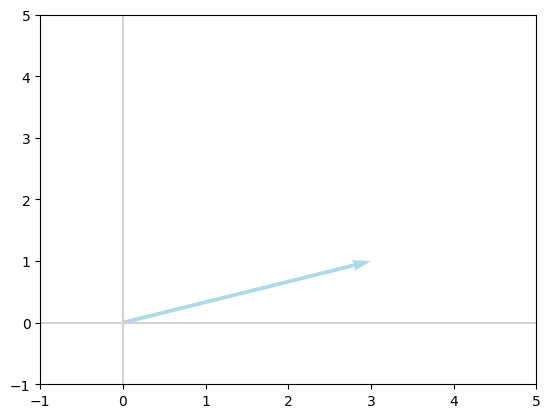

In [54]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector: 

In [55]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [56]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [57]:
v == Iv

array([ True,  True])

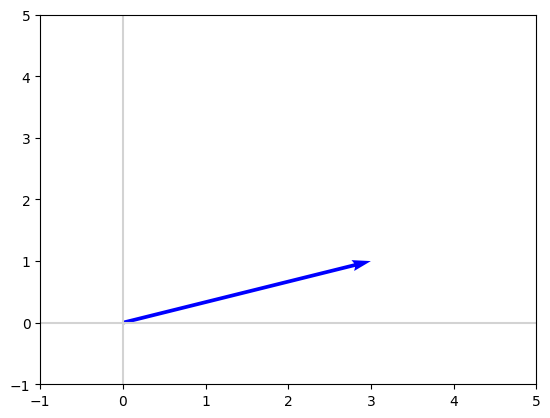

In [58]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis: 

In [59]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [60]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

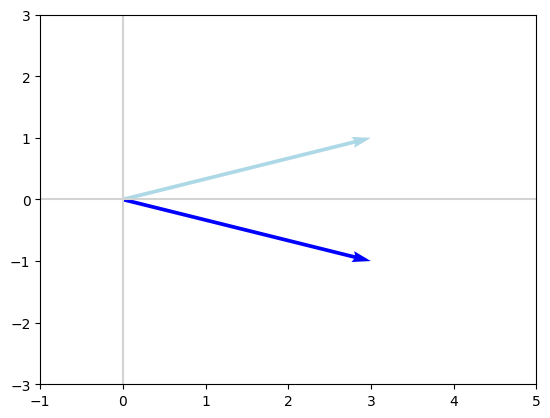

In [61]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis: 

In [62]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [63]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

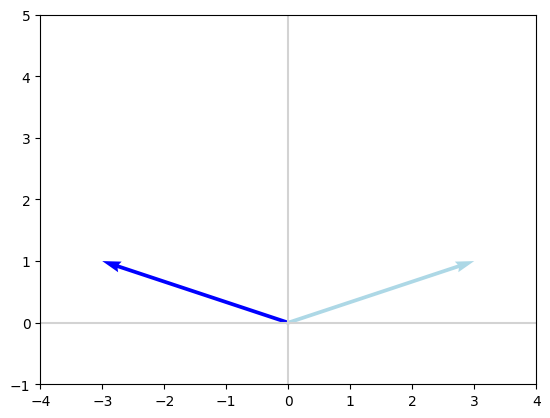

In [64]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation* 

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$: 

In [65]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [66]:
Av = np.dot(A, v)
Av

array([1, 4])

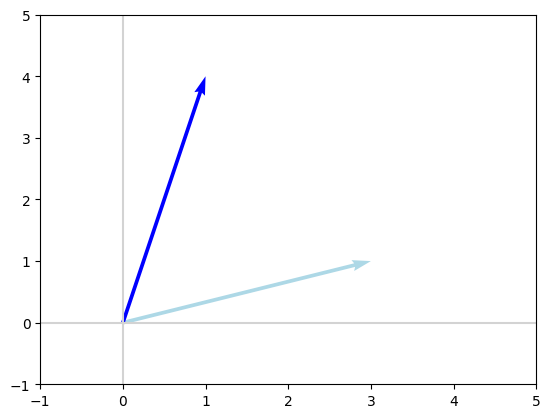

In [67]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

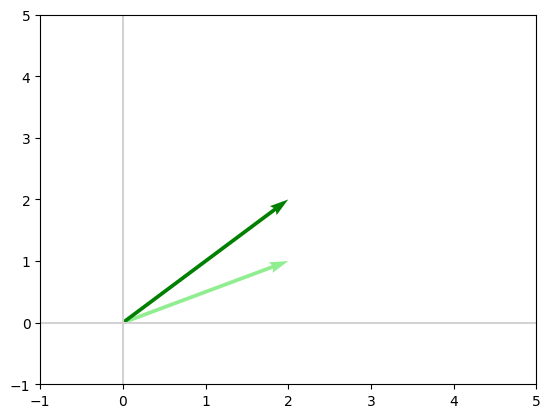

In [68]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector): 

In [69]:
v

array([3, 1])

In [70]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [71]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [72]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [73]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [74]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [75]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [76]:
vectorfy(V, 0)

array([3, 1])

In [77]:
vectorfy(V, 0) == v

array([ True,  True])

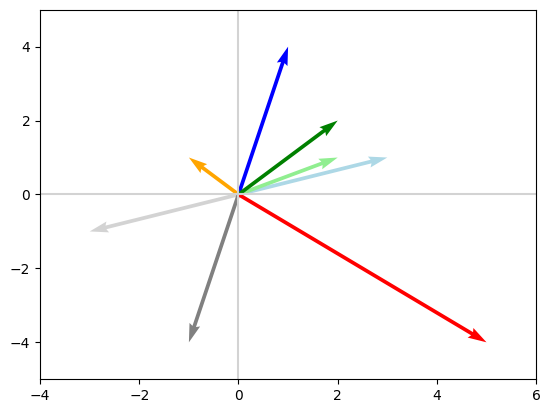

In [78]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

### Eigenvectors and Eigenvalues

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

Easiest way to understand this is to work through an example: 

In [79]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [80]:
lambdas, V = np.linalg.eig(A) 

The matrix contains as many eigenvectors as there are columns of A: 

In [81]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [82]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector: 

In [83]:
v = V[:,0] 
v

array([0.86011126, 0.51010647])

In [84]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [85]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [86]:
lambduh * v

array([1.18031462, 0.70000958])

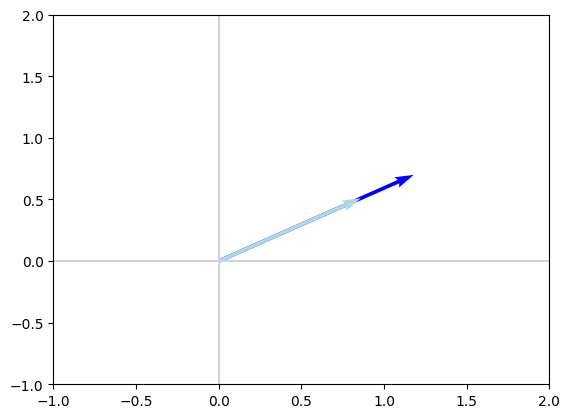

In [87]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

And again for the second eigenvector of A: 

In [88]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [89]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [90]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [91]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

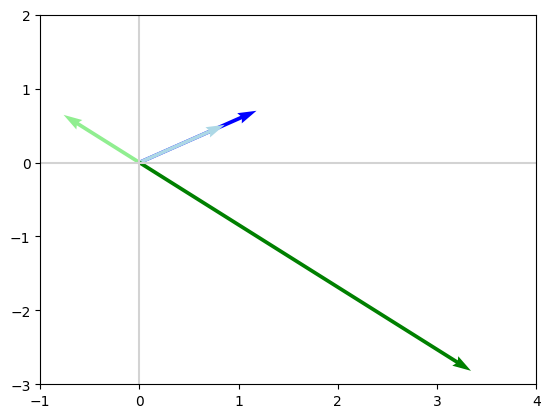

In [92]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using the PyTorch `eig()` method, we can do exactly the same: 

In [93]:
A

array([[-1,  4],
       [ 2, -2]])

In [94]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [95]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [96]:
V_cplx # complex-typed values with "0.j" imaginary part are in fact real numbers

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [97]:
V_p = V_cplx.float()
V_p

C:\Users\Intel\AppData\Local\Temp\ipykernel_3864\1096125134.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ..\aten\src\ATen\native\Copy.cpp:276.)
  V_p = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [98]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [99]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [100]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [101]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [102]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [103]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [104]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [105]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [106]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [107]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

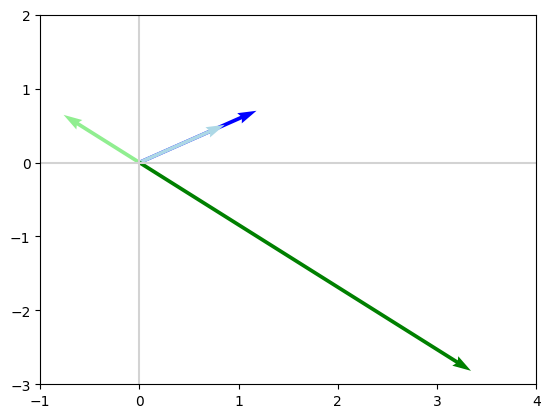

In [108]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows): 

In [109]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [110]:
lambdas_X, V_X = np.linalg.eig(X) 

In [111]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [112]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

Confirm $Xv = \lambda v$ for an example eigenvector: 

In [113]:
v_X = V_X[:,0] 
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [114]:
lambda_X = lambdas_X[0] 
lambda_X

29.676232023948902

In [115]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [116]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

**Exercises**:

1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

### 2x2 Matrix Determinants

In [117]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [118]:
np.linalg.det(X)

-2.0000000000000013

In [119]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [120]:
np.linalg.det(N)

0.0

In [121]:
# Uncommenting the following line results in a "singular matrix" error
# Ninv = np.linalg.inv(N)

In [122]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must use float not int

In [123]:
torch.det(N) 

tensor(-0.)

### Generalizing Determinants

In [124]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [125]:
np.linalg.det(X)

19.999999999999996

### Determinants & Eigenvalues

In [126]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [127]:
np.product(lambdas)

19.99999999999999

Here's $|\text{det}(X)|$ in NumPy: 

In [128]:
np.abs(np.linalg.det(X))

19.999999999999996

Let's use a matrix $B$, which is composed of basis vectors, to explore the impact of applying matrices with varying $|\text{det}(X)|$ values: 

In [129]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

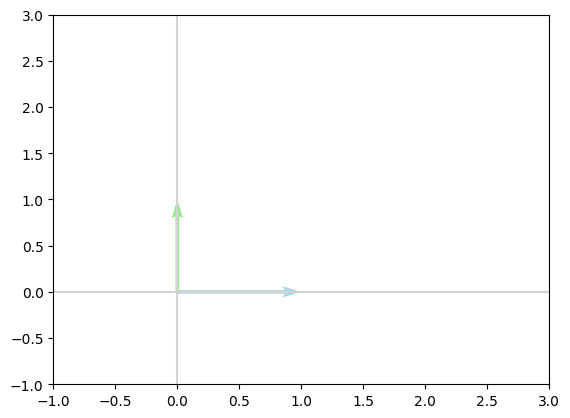

In [130]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Let's start by applying the matrix $N$ to $B$, recalling from earlier that $N$ is singular: 

In [131]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [132]:
np.linalg.det(N)

0.0

In [133]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

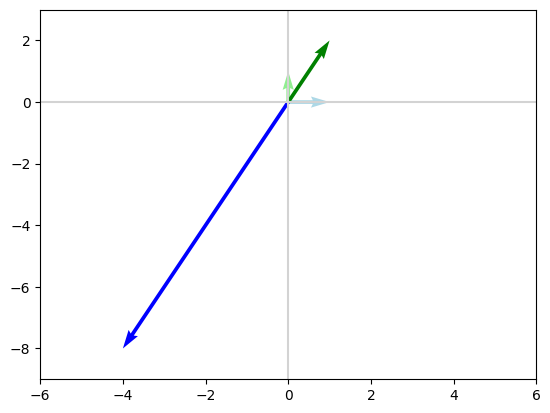

In [134]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [135]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

Aha! If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero. 

Now let's try applying $I_2$ to $B$: 

In [136]:
I

array([[1, 0],
       [0, 1]])

In [137]:
np.linalg.det(I)

1.0

In [138]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

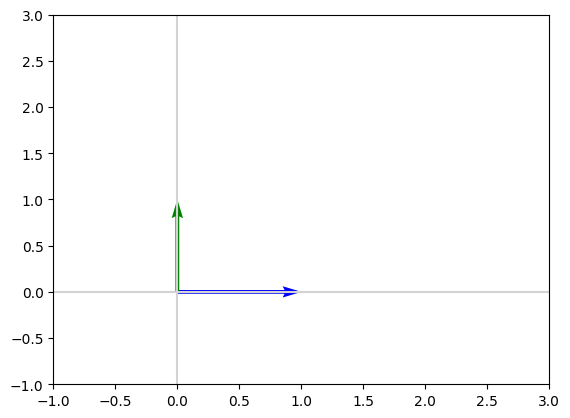

In [139]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [140]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix $J$ which is more interesting: 

In [141]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [142]:
np.linalg.det(J)

-1.0

In [143]:
np.abs(np.linalg.det(J))

1.0

In [144]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

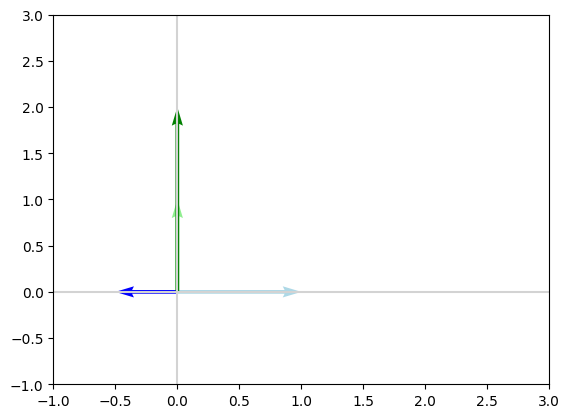

In [145]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [146]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix $D$, which scales vectors by doubling along both the $x$ and $y$ axes: 

In [147]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [148]:
np.linalg.det(D)

4.0

In [149]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

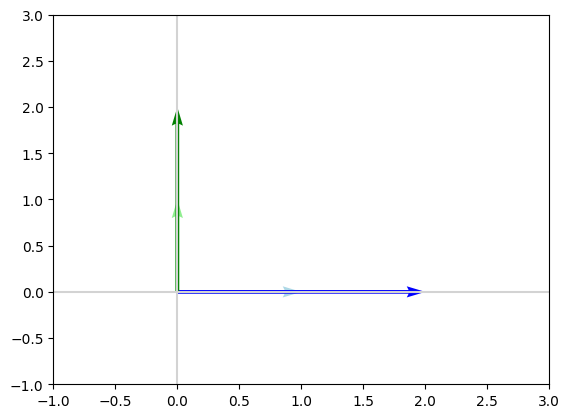

In [150]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [151]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

### Eigendecomposition

The **eigendecomposition** of some matrix $A$ is 

$A = V \Lambda V^{-1}$

Where: 

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [152]:
# This was used earlier as a matrix X; it has nice clean integer eigenvalues...
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [153]:
lambdas, V = np.linalg.eig(A)

In [154]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [155]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [156]:
lambdas

array([ 2., -1.])

In [157]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Confirm that $A = V \Lambda V^{-1}$: 

In [158]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers. 

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix. 

In [159]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [160]:
lambdas, Q = np.linalg.eig(A)

In [161]:
lambdas

array([3., 1.])

In [162]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [163]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's confirm $A = Q \Lambda Q^T$: 

In [164]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that $Q$ is an orthogonal matrix because $Q^TQ = QQ^T = I$.)

In [165]:
np.dot(Q.T, Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [166]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

**Exercises**:

1. Use PyTorch to decompose the matrix $P$ (below) into its components $V$, $\Lambda$, and $V^{-1}$. Confirm that $P = V \Lambda V^{-1}$.
2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [167]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [168]:
l1, V1=torch.linalg.eig(P)

In [169]:
l1

tensor([23.7644+0.j,  6.6684+0.j, -3.4328+0.j])

In [170]:
V1

tensor([[ 0.9511+0.j, -0.2386+0.j,  0.1626+0.j],
        [ 0.1218+0.j, -0.1924+0.j, -0.7705+0.j],
        [ 0.2837+0.j, -0.9519+0.j,  0.6163+0.j]])

In [171]:
l2=torch.diag(l1)
l2

tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])

In [172]:
Vin=torch.linalg.inv(V1)
Vin

tensor([[ 1.1356+0.j,  0.0102+0.j, -0.2868+0.j],
        [ 0.3914+0.j, -0.7198-0.j, -1.0032-0.j],
        [ 0.0817+0.j, -1.1164-0.j,  0.2052+0.j]])

In [173]:
R=torch.matmul(V1, torch.matmul(l2, Vin))
R

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 3.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [ 5.0000+0.j,  7.0000+0.j,  4.0000+0.j]])

In [174]:
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [175]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [176]:
Sl, Se=torch.linalg.eig(S)

In [177]:
k=torch.diag(Sl)
k

tensor([[26.2361+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  3.2435+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -2.4796+0.j]])

In [178]:
Se

tensor([[ 0.9744+0.j,  0.1943+0.j, -0.1132+0.j],
        [ 0.0614+0.j,  0.2548+0.j,  0.9651+0.j],
        [-0.2163+0.j,  0.9473+0.j, -0.2363+0.j]])

In [179]:
L=torch.matmul(Se, torch.matmul(k,Se.T))
L

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 2.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [-5.0000+0.j,  1.0000+0.j,  4.0000+0.j]])

## Segment 3: Matrix Operations for ML

### Singular Value Decomposition (SVD)

As on slides, SVD of matrix $A$ is: 

$A = UDV^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [180]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [181]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [182]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [220]:
k1=np.matmul(A, A.T)
k1

array([[ 5, -7,  9],
       [-7, 13,  1],
       [ 9,  1, 74]])

In [225]:
lambdhas, V2=np.linalg.eig(k1)
V2

array([[-0.12708324,  0.87125411, -0.47409506],
       [-0.00164602,  0.47778451,  0.87847553],
       [-0.99189069, -0.11241989,  0.0592843 ]])

In [183]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [184]:
d

array([8.66918448, 4.10429538])

In [185]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

$D$ must have the same dimensions as $A$ for $UDV^T$ matrix multiplication to be possible: 

In [186]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [187]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

In [202]:
P = np.array([[25, 2, -5], [3, -2, 1], [5, 7, 4]])
P

array([[25,  2, -5],
       [ 3, -2,  1],
       [ 5,  7,  4]])

In [203]:
U, D, VT=np.linalg.svd(P)

In [204]:
U # left singular vector

array([[-0.97571953,  0.18227289,  0.1214413 ],
       [-0.09750433,  0.1350092 , -0.9860352 ],
       [-0.19612318, -0.97393486, -0.11395871]])

In [193]:
D # singular values

array([26.16323489,  8.1875465 ,  2.53953194])

In [194]:
VT # Right Singular vector

array([[-0.98099938, -0.11960649,  0.15275636],
       [ 0.01125803, -0.82112714, -0.57063428],
       [-0.19368396,  0.55807214, -0.80687174]])

In [196]:
D1=np.diag(D)
D1

array([[26.16323489,  0.        ,  0.        ],
       [ 0.        ,  8.1875465 ,  0.        ],
       [ 0.        ,  0.        ,  2.53953194]])

In [205]:
np.dot(U, np.dot(D1,VT))

array([[25.,  2., -5.],
       [ 3., -2.,  1.],
       [ 5.,  7.,  4.]])

In [206]:
P

array([[25,  2, -5],
       [ 3, -2,  1],
       [ 5,  7,  4]])

SVD and eigendecomposition are closely related to each other: 

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$ = square roots of eigenvalues of $A^TA$

**Exercise**: Using the matrix `P` from the preceding PyTorch exercises, demonstrate that these three SVD-eigendecomposition equations are true. 

In [207]:
U

array([[-0.97571953,  0.18227289,  0.1214413 ],
       [-0.09750433,  0.1350092 , -0.9860352 ],
       [-0.19612318, -0.97393486, -0.11395871]])

In [215]:
k=np.dot(P, P.T)
k

array([[654,  66, 119],
       [ 66,  14,   5],
       [119,   5,  90]])

In [217]:
np.dot(P.T, P)

array([[ 659,   79, -102],
       [  79,   57,   16],
       [-102,   16,   42]])

### Image Compression via SVD

The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [226]:
from PIL import Image

Fetch photo of Oboe, a terrier, with the book *Deep Learning Illustrated*: 

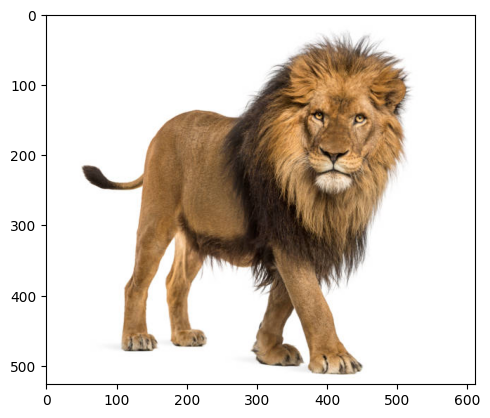

In [227]:
img = Image.open('lion.jpg')
_ = plt.imshow(img)

In [230]:
img.size

(612, 527)

Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels: 

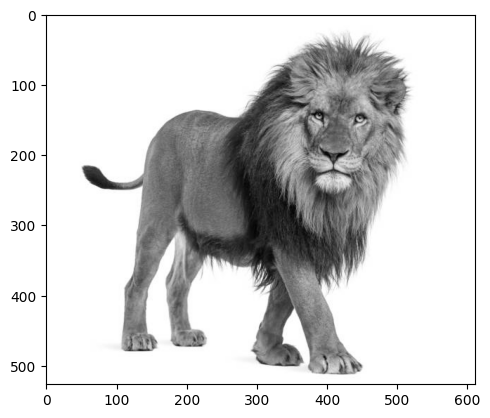

In [231]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convert data into numpy matrix, which doesn't impact image data: 

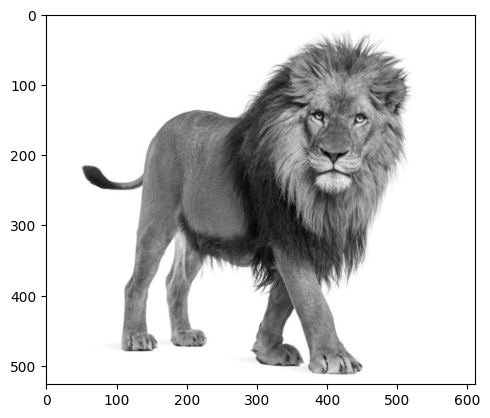

In [232]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calculate SVD of the image: 

In [234]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image: 

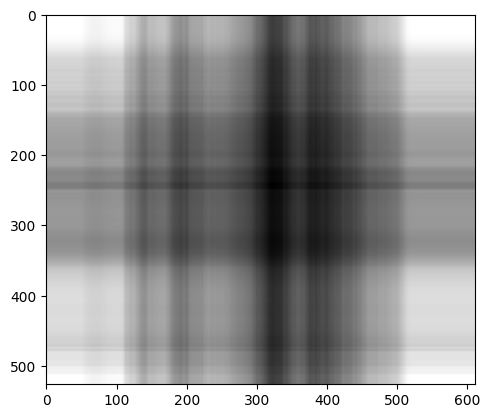

In [237]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Additional singular vectors improve the image quality: 

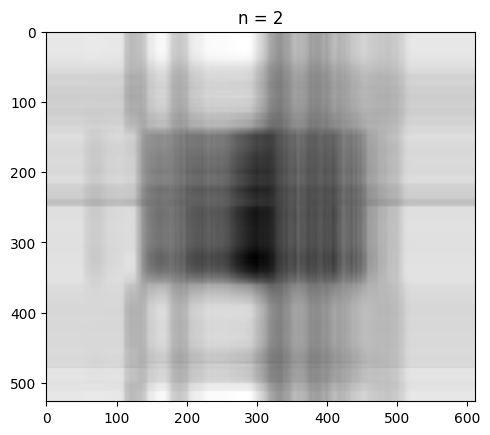

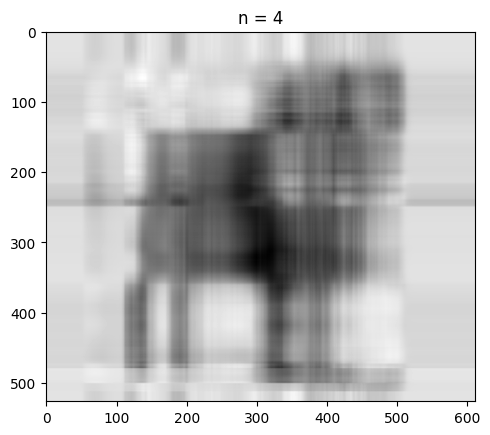

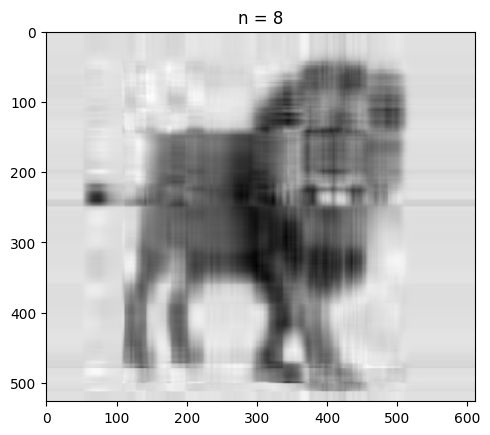

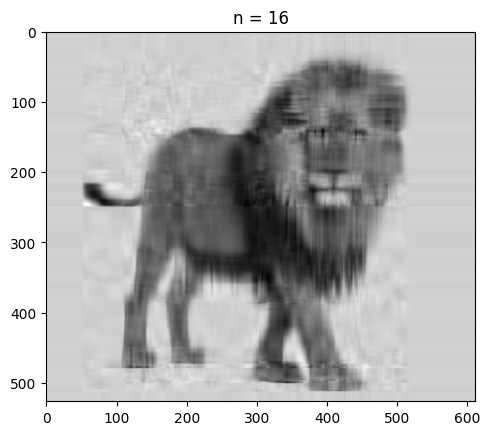

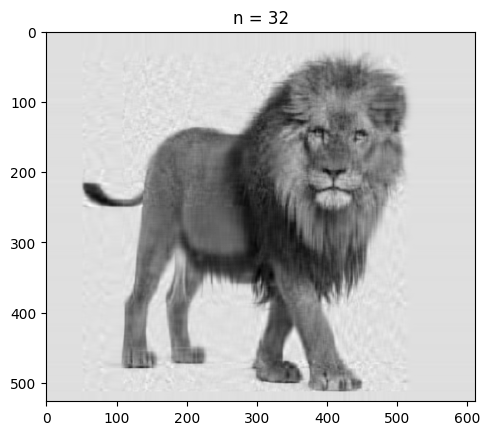

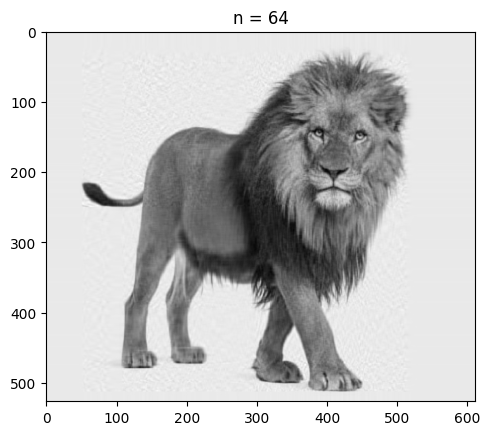

In [243]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [244]:
imgmat.shape

(527, 612)

In [245]:
full_representation = 4032*3024
full_representation

12192768

In [246]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

451648

In [247]:
svd64_rep/full_representation

0.037042286050222556

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original! 

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.

### The Moore-Penrose Pseudoinverse

Let's calculate the pseudoinverse $A^+$ of some matrix $A$ using the formula from the slides: 

$A^+ = VD^+U^T$

In [248]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

As shown earlier, the NumPy SVD method returns $U$, $d$, and $V^T$:

In [249]:
U, d, VT = np.linalg.svd(A)

In [250]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [251]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [252]:
d

array([8.66918448, 4.10429538])

To create $D^+$, we first invert the non-zero values of $d$: 

In [253]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [254]:
1/8.669

0.11535355865728457

In [255]:
1/4.104

0.24366471734892786

...and then we would take the tranpose of the resulting matrix.

Because $D$ is a diagonal matrix, this can, however, be done in a single step by inverting $D$: 

In [256]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

$D^+$ must have the same dimensions as $A^T$ in order for $VD^+U^T$ matrix multiplication to be possible: 

In [257]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

(Recall $D$ must have the same dimensions as $A$ for SVD's $UDV^T$, but for MPP $U$ and $V$ have swapped sides around the diagonal matrix.)

Now we have everything we need to calculate $A^+$ with $VD^+U^T$: 

In [258]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Working out this derivation is helpful for understanding how Moore-Penrose pseudoinverses work, but unsurprisingly NumPy is loaded with an existing method `pinv()`: 

In [259]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

**Exercise** 

Use the `torch.svd()` method to calculate the pseudoinverse of `A_p`, confirming that your result matches the output of `torch.pinverse(A_p)`: 

In [260]:
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [261]:
U, d3, VT=torch.svd(A_p)

In [266]:
U.T

tensor([[ 0.1271,  0.0016,  0.9919],
        [ 0.4741, -0.8785, -0.0593]])

In [283]:
U.T.shape

torch.Size([2, 3])

 perform SVD on a matrix or a tensor, you typically obtain U, Σ, and V^T. The right singular vectors are not transposed in this representation.

In [324]:
VTp = torch.concatenate((VT.T, torch.tensor([[0, 0]])), axis=0)
VTp

tensor([[ 0.5580,  0.8298],
        [-0.8298,  0.5580],
        [ 0.0000,  0.0000]])

In [306]:
d4=torch.diag(d3)
d6 = torch.linalg.inv(d4)
d5=torch.concatenate((d6, torch.tensor([[0,0]])), axis=0)
d5

tensor([[0.1154, 0.0000],
        [0.0000, 0.2436],
        [0.0000, 0.0000]])

In [307]:
d5.shape

torch.Size([3, 2])

In [308]:
U.T.shape

torch.Size([2, 3])

In [325]:
torch.mm(VTp.T, torch.mm(d5, U.T))

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [304]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

For regression problems, we typically have many more cases ($n$, or rows of $X$) than features to predict (columns of $X$). Let's solve a miniature example of such an overdetermined situation. 

We have eight data points ($n$ = 8): 

In [326]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [327]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

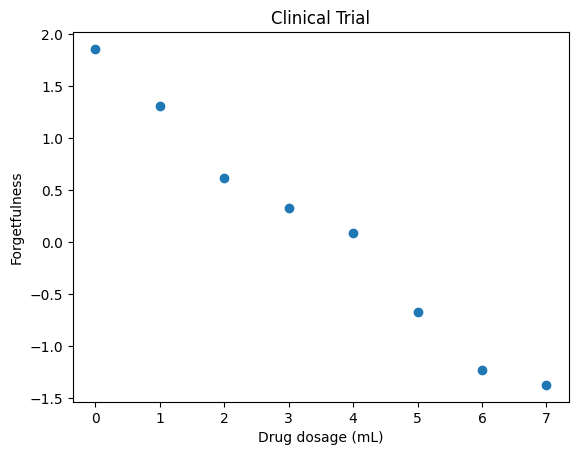

In [328]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Although it appears there is only one predictor ($x_1$), our model requires a second one (let's call it $x_0$) in order to allow for a $y$-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The $y$-intercept is constant across all the points so we can set it equal to `1` across the board:

In [329]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate $x_0$ and $x_1$ into a matrix $X$: 

In [330]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

From the slides, we know that we can calculate the weights $w$ using the equation $w = X^+y$: 

In [331]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

The first weight corresponds to the $y$-intercept of the line, which is typically denoted as $b$: 

In [332]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999985

While the second weight corresponds to the slope of the line, which is typically denoted as $m$: 

In [333]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

With the weights we can plot the line to confirm it fits the points: 

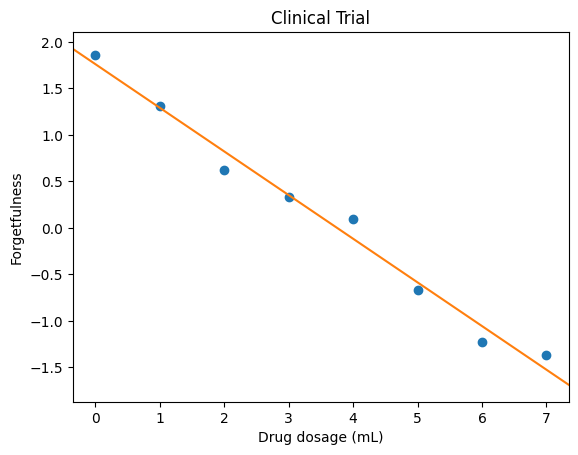

In [334]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

### The Trace Operator

Denoted as Tr($A$). Simply the sum of the diagonal elements of a matrix: $$\sum_i A_{i,i}$$

In [335]:
A = np.array([[25, 2], [5, 4]])
A

array([[25,  2],
       [ 5,  4]])

In [336]:
25 + 4

29

In [337]:
np.trace(A)

29

The trace operator has a number of useful properties that come in handy while rearranging linear algebra equations, e.g.:

* Tr($A$) = Tr($A^T$)
* Assuming the matrix shapes line up: Tr($ABC$) = Tr($CAB$) = Tr($BCA$)

In particular, the trace operator can provide a convenient way to calculate a matrix's Frobenius norm: $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

**Exercises**

With the matrix `A_p` provided below: 

1. Use the PyTorch trace method to calculate the trace of `A_p`.
2. Use the PyTorch Frobenius norm method and the trace method to demonstrate that $||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$

In [338]:
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [339]:
torch.trace(A_p)

tensor(-3.)

In [343]:
torch.norm(A_p, p='fro')

tensor(9.5917)

In [351]:
k=torch.mm(A_p, A_p.T)
torch.sqrt(torch.trace(k))


tensor(9.5917)

### Principal Component Analysis

This PCA example code is adapted from [here](https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/PCA.ipynb).

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
iris.data.shape

(150, 4)

In [12]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [14]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)

In [34]:
X = pca.fit_transform(iris.data)

In [35]:
X.shape

(150, 2)

In [36]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

In [37]:
import matplotlib.pyplot as plt

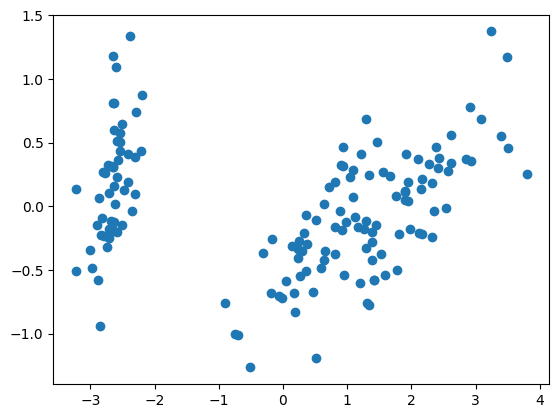

In [38]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [39]:
iris.target.shape

(150,)

In [40]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [41]:
import numpy as np

In [42]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]], dtype=int64)

In [43]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

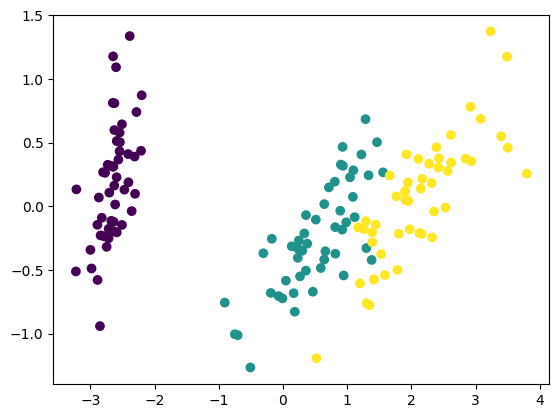

In [44]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)